In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\chkee\Downloads\Imarticus Learning\Python"

C:\Users\chkee\Downloads\Imarticus Learning\Python


In [3]:
metabolicdata=pd.read_excel("metabolic_syndrome multinomial dataset.xlsx")

In [4]:
metabolicdata.info()
#hba1c is the dependent variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   codesub   4340 non-null   object 
 1   age       4340 non-null   int64  
 2   hpt       4340 non-null   object 
 3   smoking   4340 non-null   object 
 4   dmdx      4340 non-null   object 
 5   height    4339 non-null   float64
 6   weight    4338 non-null   float64
 7   waist     4338 non-null   float64
 8   hip       4338 non-null   float64
 9   msbpr     4340 non-null   float64
 10  mdbpr     4340 non-null   float64
 11  hba1c     4270 non-null   float64
 12  fbs       4092 non-null   float64
 13  mogtt1h   3736 non-null   float64
 14  mogtt2h   3732 non-null   float64
 15  totchol   4286 non-null   float64
 16  ftrigliz  4287 non-null   float64
 17  hdl       4288 non-null   float64
 18  ldl       4287 non-null   float64
 19  gender    4340 non-null   object 
 20  crural    4340 non-null   obje

In [5]:
#separate num and non num cols in preprocessing
numcols=metabolicdata.select_dtypes(include=np.number)
objcols=metabolicdata.select_dtypes(include=['object'])

In [6]:
numcols.describe()
#check mean and median they should be near
#check if there are categorical var in numerical var
# we can check above stat by-min=0 and max=1 then its categoric var.

,age,height,weight,waist,hip,msbpr,mdbpr,hba1c,fbs,mogtt1h,mogtt2h,totchol,ftrigliz,hdl,ldl
count,4340.000000,4339.000000,4338.000000,4338.000000,4338.000000,4340.000000,4340.000000,4270.000000,4092.000000,3736.00000,3732.000000,4286.000000,4287.000000,4288.000000,4287.000000
mean,47.841244,1.567534,63.751814,86.323642,97.883806,133.537002,78.467108,5.805199,5.733876,9.10625,7.343365,5.791594,1.533944,1.345406,3.549153
std,14.514511,0.085950,14.170264,12.942197,10.583373,23.429004,12.053125,1.448404,2.551954,3.85036,3.716139,1.279834,1.052120,0.360008,1.122977
min,18.000000,1.270000,30.000000,50.800000,61.000000,68.500000,41.500000,0.200000,2.500000,0.16000,0.160000,0.180000,0.110000,0.080000,0.140000
25%,38.000000,1.510000,53.800000,77.000000,91.000000,117.000000,70.000000,5.100000,4.480000,6.54000,5.150000,4.970000,0.930000,1.110000,2.790000
50%,48.000000,1.560000,62.000000,86.000000,97.000000,130.000000,77.500000,5.400000,5.180000,8.59000,6.600000,5.700000,1.260000,1.320000,3.460000
75%,58.000000,1.630000,71.975000,95.000000,104.000000,146.500000,86.000000,5.800000,6.020000,10.84000,8.410000,6.530000,1.770000,1.540000,4.245000
max,89.000000,1.960000,187.800000,154.500000,160.000000,237.000000,128.500000,15.000000,28.010000,41.50000,37.370000,23.140000,12.660000,4.430000,10.560000


In [7]:
#impute the missing columns-height,weight,waist,hip,hba1c,fbs,mogtt1h,mogtt2h,totchol,ftrigliz,hdl,ldl
numcols.weight=numcols.weight.fillna(numcols.weight.mean())

In [8]:
numcols.height=numcols.height.fillna(numcols.height.mean())

In [9]:
numcols.waist=numcols.waist.fillna(numcols.waist.mean())

In [10]:
numcols.hip=numcols.hip.fillna(numcols.hip.mean())

In [11]:
numcols.hba1c=numcols.hba1c.fillna(numcols.hba1c.mean())

In [12]:
numcols.fbs=numcols.fbs.fillna(numcols.fbs.mean())

In [13]:
numcols.mogtt1h=numcols.mogtt1h.fillna(numcols.mogtt1h.mean())

In [14]:
numcols.mogtt2h=numcols.mogtt2h.fillna(numcols.mogtt2h.mean())

In [15]:
numcols.totchol=numcols.totchol.fillna(numcols.totchol.mean())

In [16]:
numcols.ftrigliz=numcols.ftrigliz.fillna(numcols.ftrigliz.mean())

In [17]:
numcols.hdl=numcols.hdl.fillna(numcols.hdl.mean())

In [18]:
numcols.ldl=numcols.ldl.fillna(numcols.ldl.mean())

In [19]:
#for imputing the missing columns at a time we use for loop
#syntax-dfname.colname=df.colname.fillna(dfname.colname.mean()/median())

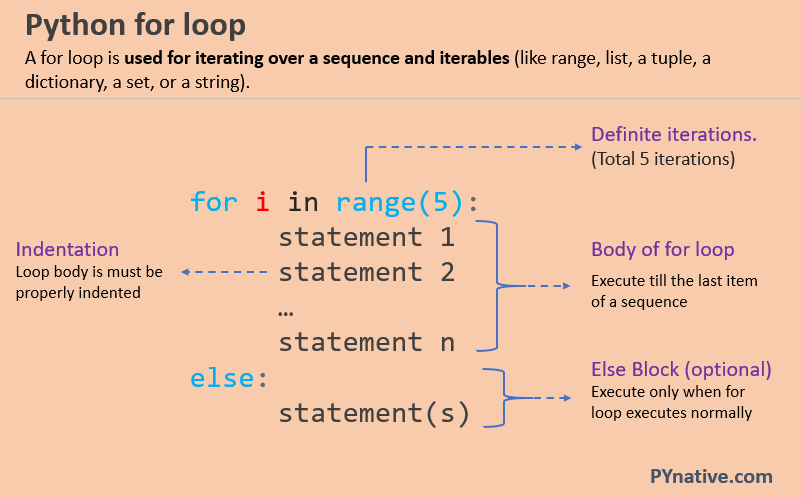

In [20]:
#in the statement of loop we use i
for i in numcols.columns:
    numcols[i]=numcols[i].fillna(numcols[i].mean())

In [21]:
objcols.columns

Index(['codesub', 'hpt', 'smoking', 'dmdx', 'gender', 'crural'], dtype='object')

In [22]:
objcols.hpt.value_counts()

no     3836
yes     504
Name: hpt, dtype: int64

In [23]:
objcols.smoking.value_counts()

never smoked       3307
still smoking       698
quitted smoking     335
Name: smoking, dtype: int64

In [24]:
objcols.dmdx.value_counts()

no     3870
yes     470
Name: dmdx, dtype: int64

In [25]:
objcols.gender.value_counts()

female    2817
male      1523
Name: gender, dtype: int64

In [26]:
objcols.crural.value_counts()

urban    2218
rural    2122
Name: crural, dtype: int64

In [27]:
#Drop the dependent variable
numcols1=numcols.drop('hba1c',axis=1)

In [28]:
numcols1.columns

Index(['age', 'height', 'weight', 'waist', 'hip', 'msbpr', 'mdbpr', 'fbs',
       'mogtt1h', 'mogtt2h', 'totchol', 'ftrigliz', 'hdl', 'ldl'],
      dtype='object')

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols,orient='h')

NameError: name 'sns' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
#data transformation for independent numeric values
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
stdscaler=StandardScaler()

In [ ]:
numcols1_scaled=stdscaler.fit_transform(numcols1)
#all the numeric data is converted into similar datatype

In [ ]:
#converting arrays to dstaframe
numcols1_scaled=pd.DataFrame(numcols1_scaled,columns=numcols1.columns)

In [ ]:
numcols1_scaled.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols1_scaled,orient='h')

In [ ]:
#Normalisation or MINMAXscaler
minmax=MinMaxScaler()

In [ ]:
numcols1_minmax=minmax.fit_transform(numcols1)

In [ ]:
numcols1_minmax=pd.DataFrame(numcols1_minmax,columns=numcols1.columns)

In [ ]:
numcols1_minmax.head()
#there are no negative values and rnge is only 0-1 in normalisation

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols1_minmax,orient='h')

In [ ]:
#ROBUST SCALER-Uses quartiles used in case of outliers
robust=RobustScaler()

In [ ]:
numcols1_robust=robust.fit_transform(numcols1)

In [ ]:
numcols1_robust=pd.DataFrame(numcols1_robust,columns=numcols1.columns)

In [ ]:
numcols1_robust.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(numcols1_robust,orient='h')

In [ ]:
#check for relationship

#corelation and covariance
numcols1.cov()

In [ ]:
sns.heatmap(numcols1.cov(),annot=True)

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(numcols1)

In [ ]:
# multicollinearity-very strong corelation(>0.95)
plt.figure(figsize=(20,10))
sns.heatmap(numcols1.corr(),annot=True,cmap='coolwarm')
#cmap=coolwarm,plasma,rocket,flare,magma,crest

In [ ]:
numcols1.corr()

In [ ]:
meta_df=pd.concat([numcols,objcols],axis=1)

In [ ]:
#Hypothesis testing
#test null average hba1c of gender male/female equal
#test null average waist of gender male/female equal

#test null average totchol of smoking equal
#test null average fbs of smoking equal

#test null no association between smoking and gender
#test null no association between smoking and crural

In [ ]:
#test null average hba1c of gender male/female equal
meta_df.hba1c.groupby(meta_df.gender).mean()

In [ ]:
#2 classes we use 2 independent ttest
#check variance
meta_df.hba1c.groupby(meta_df.gender).var()

In [ ]:
#split the data
gf=meta_df[meta_df.gender=='female']  #genderfemale
gm=meta_df[meta_df.gender=='male']    #gender male

In [ ]:
#null-there is no significant diff b/w gender and hba1c
#alt-there is a significant diff b/w gender and hba1c

In [ ]:
#2 independent ttest of unequal variance
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(gf.hba1c,gm.hba1c,equal_var=False)
##null-there is no significant diff b/w gender and hba1c
#pvalue=0.4186540140235876- fail to reject null

In [ ]:
##test null average waist of gender male/female equal
meta_df.waist.groupby(meta_df.gender).mean()

In [ ]:
#check variance
meta_df.waist.groupby(meta_df.gender).var()

In [ ]:
ttest_ind(gf.waist,gm.waist,equal_var=False)
##alt-there is a significant diff b/w gender and waist
#pvalue=1.6606918519162976e-15- fail to reject null

In [ ]:
#test null average totchol of smoking equal
meta_df.totchol.groupby(meta_df.smoking).mean()

In [ ]:
#>3 classes ANNOVA
from scipy.stats import f_oneway

In [ ]:
#null-there is no significant diff b/w smoking and totchol
#alt-there is a significant diff b/w smoking and totchol

In [ ]:
#split data
ns=meta_df[meta_df.smoking=='never smoked']
qs=meta_df[meta_df.smoking=='quitted smoking']
ss=meta_df[meta_df.smoking=='still smoking']

In [ ]:
f_oneway(ns.totchol,qs.totchol,ss.totchol)
##alt-there is a significant diff b/w smoking and totchol

In [ ]:
#test null average fbs of smoking equal
meta_df.fbs.groupby(meta_df.smoking).mean()

In [ ]:
f_oneway(ns.fbs,qs.fbs,ss.fbs)
#alt-there is a significant diff b/w smoking and fbs
#pvalue=0.014134689163183814 <0.05

In [ ]:
#test null no association between smoking and gender
#both are categoric
pd.crosstab(meta_df.smoking,meta_df.gender)

In [ ]:
#null-there is a significant relationship b/w smoking and gender
#Alt-there is no significant relationship b/w smoking and gender

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(meta_df.smoking,meta_df.gender))
##Alt-there is no significant relationship b/w smoking and gender

In [ ]:
#null-there is a significant relationship b/w smoking and crural
#Alt-there is no significant relationship b/w smoking and crural

In [ ]:
#test null no association between smoking and crural
chi2_contingency(pd.crosstab(meta_df.smoking,meta_df.crural))
##Alt-there is no significant relationship b/w smoking and crural